In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew 


In [2]:
df=pd.read_csv('Milk Grading.csv')

In [3]:
df.shape

(1059, 8)

In [4]:
df.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

### There are no missing values in this dataset

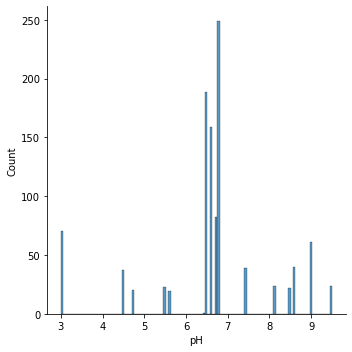

In [5]:
inc=sns.displot(df['pH'])
plt.show()

In [6]:
def Univariate(col):

    print(f'mean is {df[col].mean()}')
    print(f' median is { df[col].median() } ')

    Q1=np.quantile(df[col],0.25)
    Q3=np.quantile(df[col],0.75)

    IQR=Q3-Q1

    lower_outlier=np.quantile(df[col],0.25)-1.5*IQR 

    upper_outlier=np.quantile(df[col],0.75)+1.5*IQR

    print(f'number of entries that are lower than the 25th percentile {len(list(df[df[col]<=lower_outlier].index))} ')
    print(f'number of entries that are larger than the 75th percentile {len(list(df[df[col]>=upper_outlier].index))} ')
    
   
    plt.figure()
    sns.boxplot(data=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

#     return sns.boxplot(data=df[col])
    

mean is 6.630122757318263
 median is 6.7 
number of entries that are lower than the 25th percentile 169 
number of entries that are larger than the 75th percentile 210 


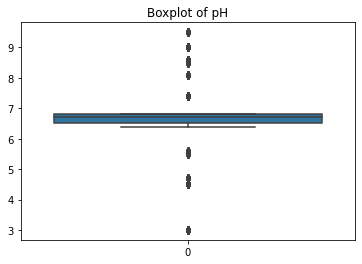

mean is 44.226628895184135
 median is 41.0 
number of entries that are lower than the 25th percentile 0 
number of entries that are larger than the 75th percentile 103 


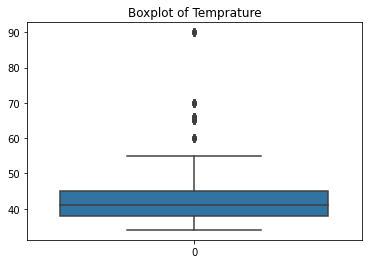

In [7]:
for i in df.columns:
    if(i=='pH' or i=='Temprature'):
        Univariate(i)


### Univariate analysis on categorical features i.e Taste Odor Fat and Turbitity

In [8]:
df['Taste'].value_counts()

1    579
0    480
Name: Taste, dtype: int64

In [9]:
def Univariate_categorical(col):
    lis=list(df[col].value_counts())
    lis2=list(df[col].unique())

    sns.countplot(x=col,data=df)
    plt.show()


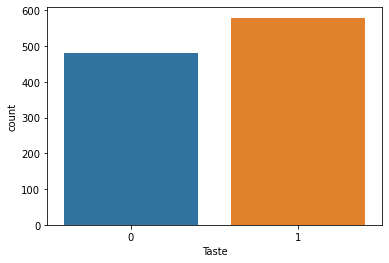

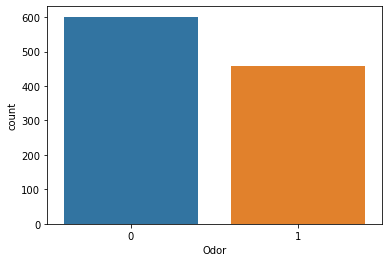

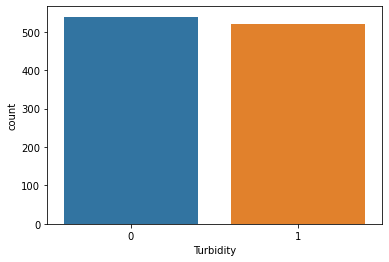

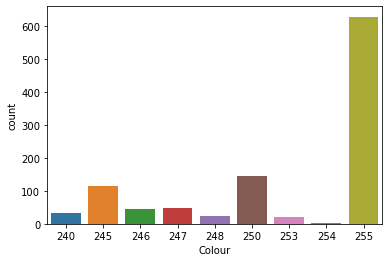

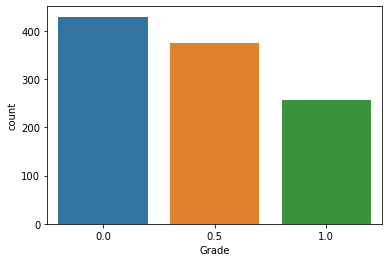

In [10]:
lis=df.columns
for i in lis:
    if(i=='Taste' or i=='Odor' or i=='Fat' or i=='Turbidity' or i=='Colour' or i=='Grade'):
         Univariate_categorical(i)

### Bivariate analysis

In [11]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

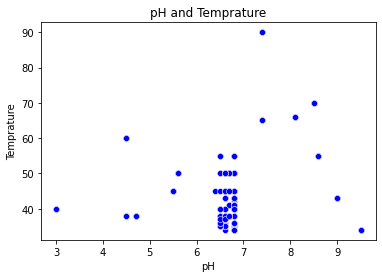

In [12]:
sns.scatterplot(x="pH", y="Temprature", data=df, marker='o', color='blue')
plt.xlabel("pH")
plt.ylabel("Temprature")
plt.title("pH and Temprature")
plt.show()


<AxesSubplot:xlabel='Grade', ylabel='Temprature'>

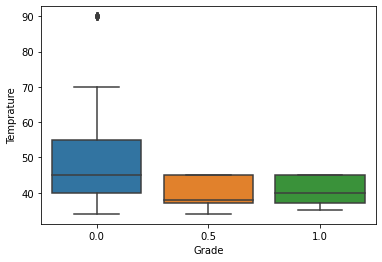

In [14]:
sns.boxplot(x=df['Grade'],y=df['Temprature'])

#### Lower Grade milk usually have higher tempratures

<AxesSubplot:xlabel='Grade', ylabel='Colour'>

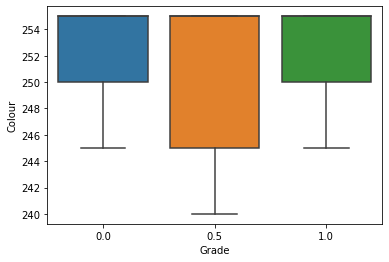

In [15]:
sns.boxplot(x=df['Grade'],y=df['Colour'])

#### There is no strong relationship between the colour and grade of the milk as it non linear

In [20]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,1.0
1,6.6,36,0,1,0,1,253,1.0
2,8.5,70,1,1,1,1,246,0.0
3,9.5,34,1,1,0,1,255,0.0
4,6.6,37,0,0,0,0,255,0.5


In [26]:
df2=df.copy()
df2['Grade'] = df2['Grade'].replace({0.5: 1, 1: 1})
df2['Grade']=df2['Grade'].astype(int)

In [27]:
df2.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,1
1,6.6,36,0,1,0,1,253,1
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=1000)

In [42]:
from sklearn.model_selection import train_test_split


In [43]:
y=df2['Grade']
X=df2.drop('Grade',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [44]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [45]:
y_pred = model.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79        78
           1       0.86      0.93      0.89       134

    accuracy                           0.86       212
   macro avg       0.86      0.83      0.84       212
weighted avg       0.86      0.86      0.86       212



In [47]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8584905660377359


In [64]:

def bivariate_categorical(col1,col2):
    contingency_table = pd.crosstab(df2[col1], df2[col2])

# Create a heatmap of the contingency table
    sns.heatmap(contingency_table, annot=True,fmt='.0f', cmap='Blues')

# Set labels and title
    plt.xlabel(col2)
    plt.ylabel(col1)
    plt.title('Heatmap of Categorical Variables')

    plt.show()




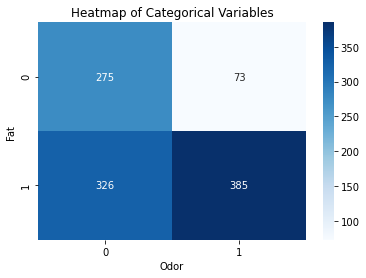

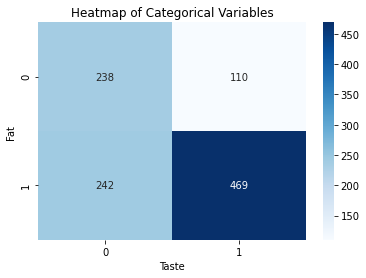

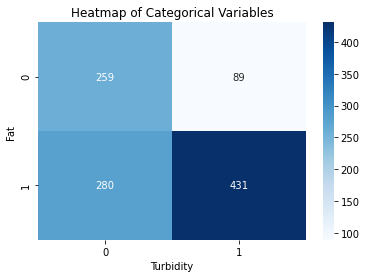

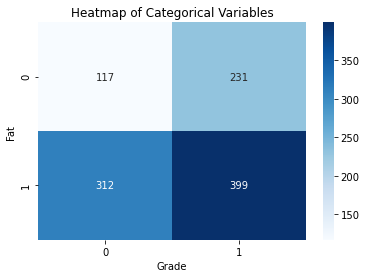

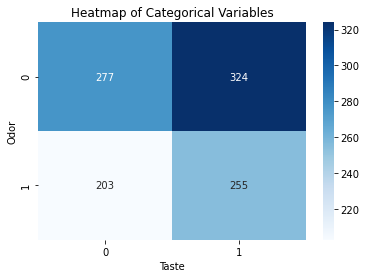

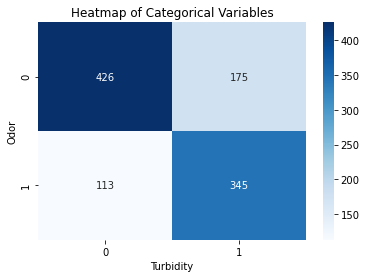

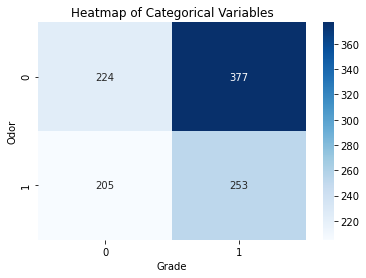

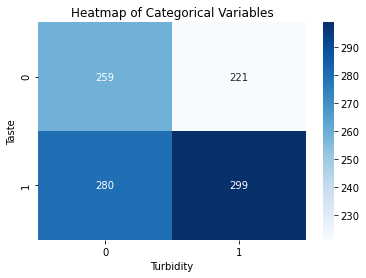

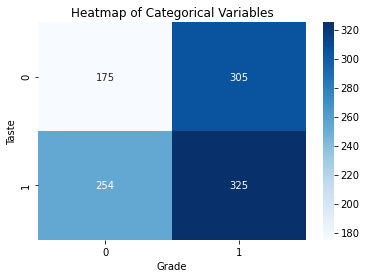

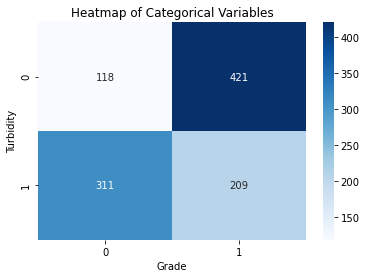

In [71]:
lis=['Fat ','Odor','Taste','Turbidity','Grade'] 
for i in range(0,len(lis)):
    for j in range(i+1,len(lis)):
        bivariate_categorical(lis[i],lis[j])

In [52]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

### Removing Odor as Turbidity is correlated with it

In [72]:
df3=df2.copy()
df3.drop('Turbidity',axis=1,inplace=True)

In [73]:
df3.head()

,pH,Temprature,Taste,Odor,Fat,Colour,Grade
0,6.6,35,1,0,1,254,1
1,6.6,36,0,1,0,253,1
2,8.5,70,1,1,1,246,0
3,9.5,34,1,1,0,255,0
4,6.6,37,0,0,0,255,1


### Support vector machines

In [96]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your feature matrix X and target vector y

# Split the data into training and testing sets
y=df3['Grade']
X=df3.drop('Grade',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier object
svm_classifier = svm.SVC(kernel='linear')

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.910377358490566


### Decision trees claissifier

In [97]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt_classifier = tree.DecisionTreeClassifier()

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9952830188679245


In [99]:
new_pred=[[8.5,70,1,1,1,246]]
predict=dt_classifier.predict(new_pred)

predict[0]


0

### An accuracy of 99 percent was been acheived using decision trees classifier